## ML1_big mart sales 

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

In [3]:
#For linear Regression using the sklearn package
import scipy.stats as stats
import sklearn

In [4]:
import os
os.chdir('C:\\Users\\MANDY\\Desktop\\dataset')

In [5]:
train=pd.read_csv('bigmart_train.csv')
test=pd.read_csv('bigmart_test.csv')
# trin=sns.load_dataset('bigmart_tr

In [133]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1400
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4230
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [134]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [135]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [136]:
len(train)

8523

In [137]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [138]:
len(test)

5681

In [139]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [140]:
len(train)-len(test)

2842

In [141]:
# print(train.dtypes)
# print(test.dtypes)

In [142]:
train['Item_Weight'].isnull().sum()

1463

In [143]:
train['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [144]:
train['Item_Weight'].mean()

12.857645184136183

In [145]:
train['Item_Weight'].median()

12.6

In [146]:
train['Item_Weight'].mode()

0    12.15
dtype: float64

In [147]:
train['Item_Weight'].replace(" ",train['Item_Weight'].mean()).head(20)

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
Name: Item_Weight, dtype: float64

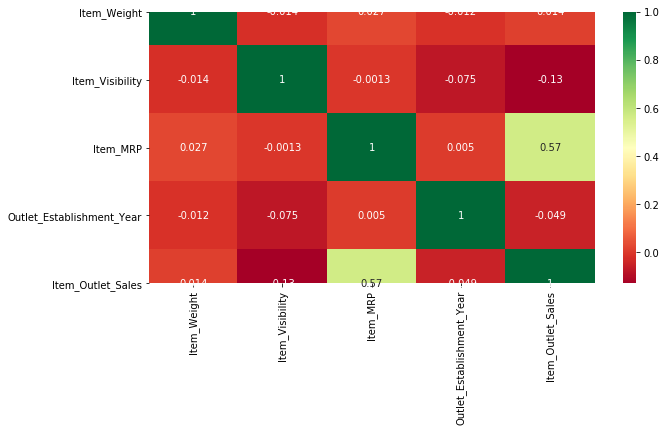

In [148]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), cmap = "RdYlGn", annot = True)

In [149]:

train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [150]:
np.log(train.Item_Weight).describe()

count    7060.000000
mean        2.481245
std         0.393703
min         1.516226
25%         2.171764
50%         2.533697
75%         2.824351
max         3.061052
Name: Item_Weight, dtype: float64

In [151]:
train.Outlet_Size.describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

### feature engineering start here
##### concitanation of both test and train data set in train 8523 columns and 13 rows in the test data set i have  5681 rows and  12 columns after concitnate i got 14204 rows and 13 columns

In [152]:
train['source']='train'
test['source']='test'
# data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape)

(8523, 13) (5681, 12)


In [153]:
# remove null value at one time it will help me to remove null value at one time
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [154]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [155]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3495
source                          1
dtype: int64

 This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

In [156]:
#Filter categorical variables
categorical_columns = [x for x in train.dtypes.index if train.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (train[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

#### missing value imputatoin

In [157]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

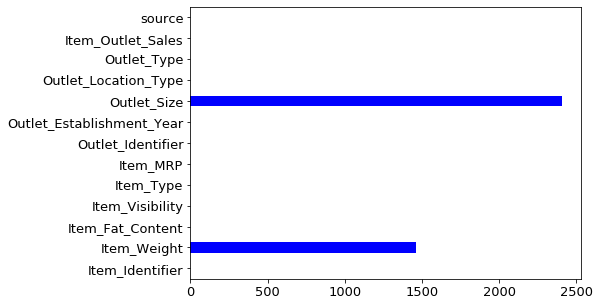

In [158]:
#Plotting the missing value information
miss = train.isnull().sum()##
miss.plot(kind='barh', figsize=(7,5), color="blue", fontsize=13)
plt.show()

In [159]:
#Getting the percentage of missing values
round(train.isnull().sum()/len(train.index)*100,3)

Item_Identifier               0.000
Item_Weight                  17.165
Item_Fat_Content              0.000
Item_Visibility               0.000
Item_Type                     0.000
Item_MRP                      0.000
Outlet_Identifier             0.000
Outlet_Establishment_Year     0.000
Outlet_Size                  28.276
Outlet_Location_Type          0.000
Outlet_Type                   0.000
Item_Outlet_Sales             0.000
source                        0.000
dtype: float64

In [160]:
#Only the variables that contains the missing values
x = round((train.isnull()).sum()/len(train.index)*100,3)
x[x>0]

Item_Weight    17.165
Outlet_Size    28.276
dtype: float64

#### mean or median imputation

In [161]:
#Making a copy of the data
train_copy = train.copy()

In [162]:
#Mean of all the variables
train_copy.mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [163]:
#Imputing the missing values in the variable totChol using the mean
#Mean of Item_Outlet_sales
train['Item_Weight']=train['Item_Weight'].fillna((train['Item_Weight'].mean()))

In [164]:
train['Outlet_Size']=train['Outlet_Size'].fillna((train['Outlet_Size'].mode()[0]))

In [165]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

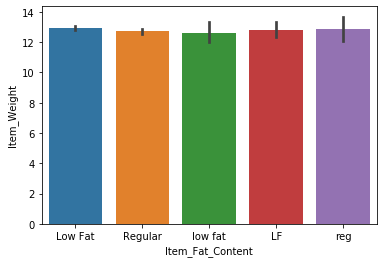

In [166]:
sns.barplot(x='Item_Fat_Content',y='Item_Weight',data=train)

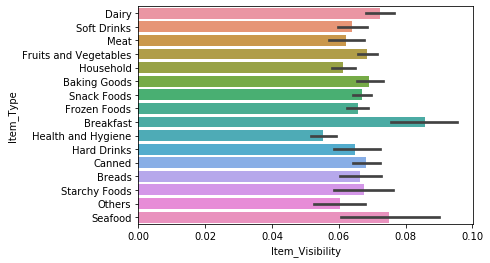

In [167]:
sns.barplot(x='Item_Visibility',y='Item_Type',data=train)

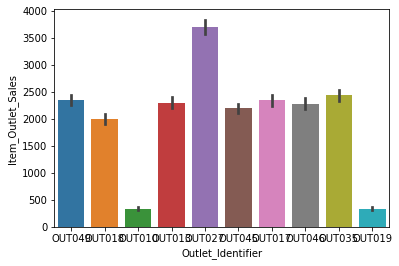

In [168]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

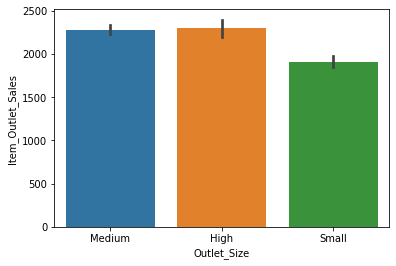

In [169]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

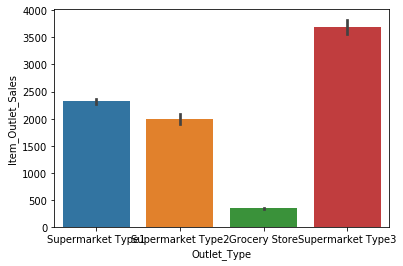

In [170]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

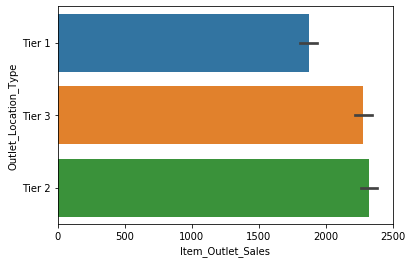

In [171]:
sns.barplot(x='Item_Outlet_Sales',y='Outlet_Location_Type',data=train)

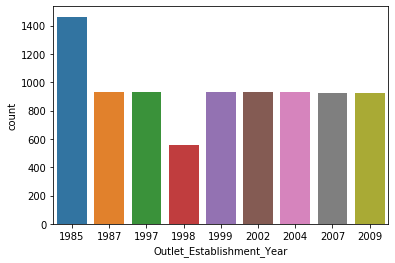

In [172]:
sns.countplot(x='Outlet_Establishment_Year',data=train)

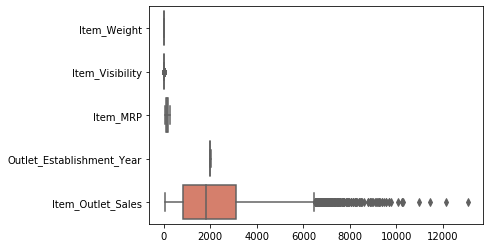

In [173]:
#Can do entire dataframe with orient='h'
sns.boxplot(data=train,palette='coolwarm',orient='h')

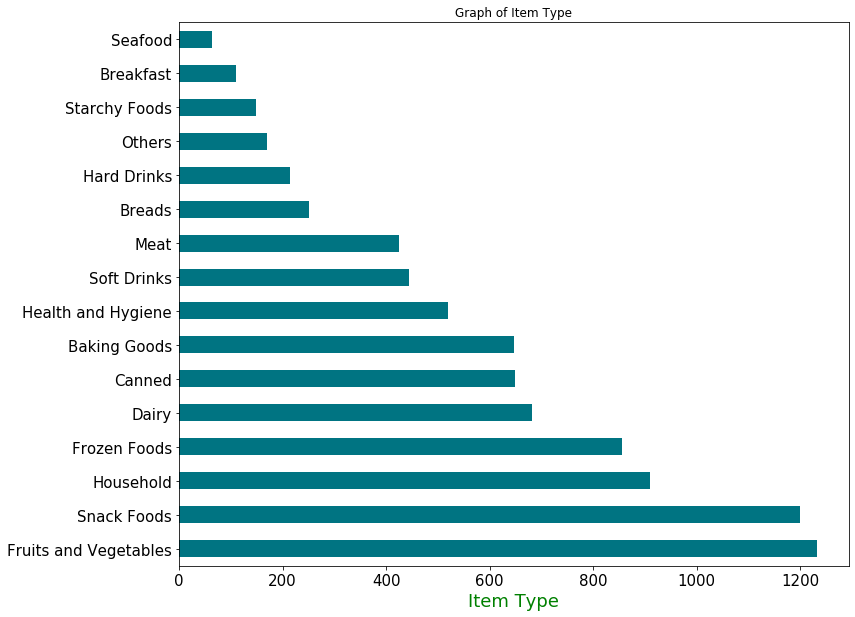

In [174]:
#initializing plot
ax = train.Item_Type.value_counts().plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Graph of Item Type')

#x-label
ax.set_xlabel('Item Type', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

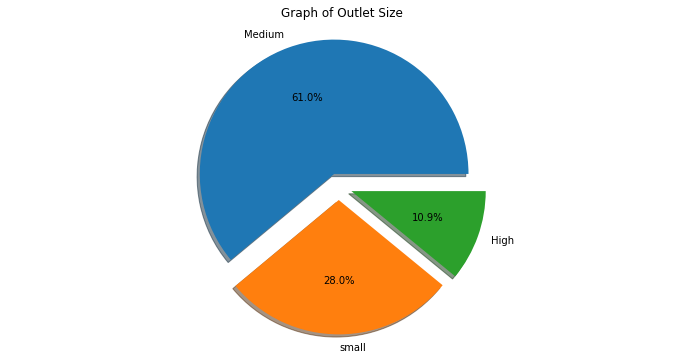

In [175]:
plt.figure(figsize=(12,6))
plt.pie(train.Outlet_Size.value_counts(),explode=[0.1,0.1,0.1],labels=['Medium', 'small', 'High'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Graph of Outlet Size')
plt.show()

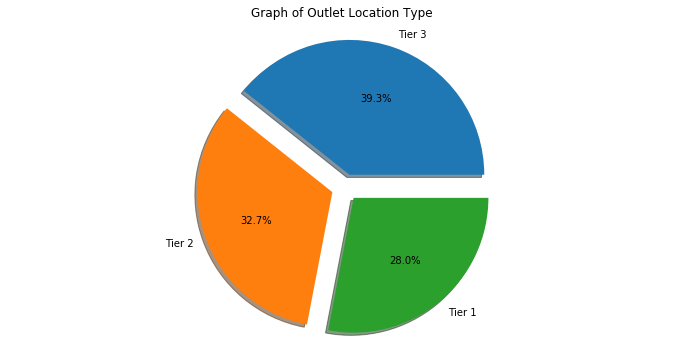

In [176]:
plt.figure(figsize=(12,6))
plt.pie(train.Outlet_Location_Type.value_counts(),explode=[0.1,0.1,0.1],labels=['Tier 3', 'Tier 2', 'Tier 1'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Graph of Outlet Location Type')
plt.show()

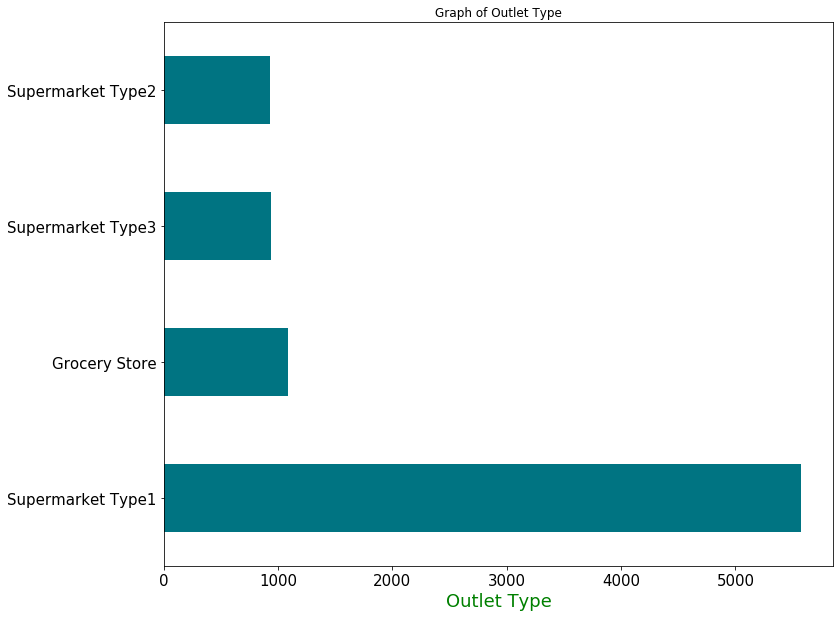

In [177]:
#initializing plot
ax = train.Outlet_Type.value_counts().plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Graph of Outlet Type')

#x-label
ax.set_xlabel('Outlet Type', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

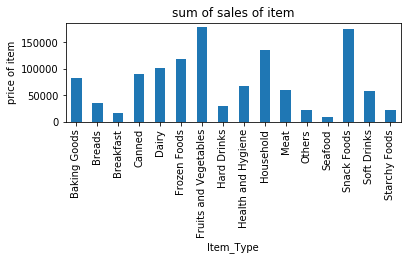

In [178]:
var = train.groupby('Item_Type').Item_MRP.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(2,1,2)
ax1.set_xlabel('Item_type')
ax1.set_ylabel('price of item')
ax1.set_title("sum of sales of item")
var.plot(kind='bar')

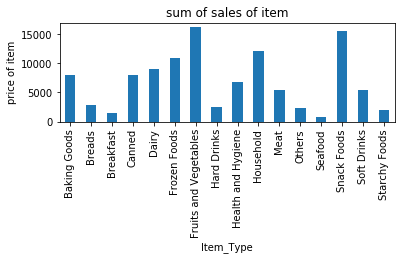

In [179]:
var = train.groupby('Item_Type').Item_Weight.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Item_type')
ax1.set_ylabel('price of item')
ax1.set_title("sum of sales of item")
var.plot(kind='bar')

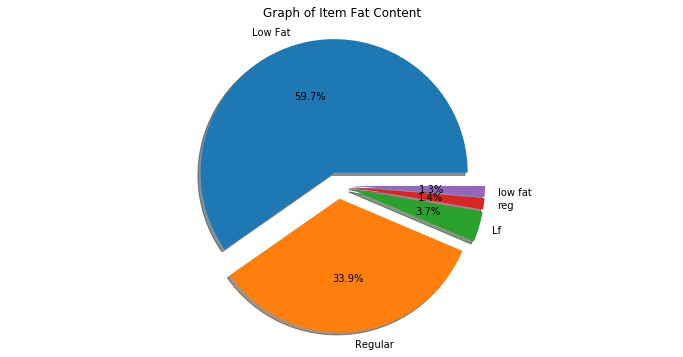

In [180]:
plt.figure(figsize=(12,6))
plt.pie(train.Item_Fat_Content.value_counts(),explode=[0.1,0.1,0.1,0.1,0.1],labels=['Low Fat','Regular','Lf','reg','low fat'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Graph of Item Fat Content')
plt.show()

In [181]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Type_Combined              0
dtype: int64

In [11]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### model building

* Numerical and One-Hot Coding of Categorical variables
* Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.
* Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

.* Lets start by making a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case lets predict the sales as the overall average sales. This can be done as:

In [12]:
#Making a Copy of Original Data
data =train.copy()

In [13]:
#Lowering the down column names
data.columns = data.columns.str.lower()

In [14]:
#Calculating Missing Values
(data.isnull().sum()/len(data))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
item_type_combined            0.000000
dtype: float64

###  Imputation Of Missing Values in the Columns:

In [15]:
#The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.
group_mean_weight = data.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [16]:
mean_weight = group_mean_weight.iloc[:,[0][0]]
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [17]:
# Function to impute Missing Value in item_weight column:

def missing_value(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277
        elif item_type == "Breads":
            return 11.347
        elif item_type == "Breakfast":
            return 12.768
        elif item_type == "Canned":
            return 12.30
        elif item_type == "Dairy":
            return 13.42
        elif item_type == "Frozen Foods":
            return  12.867061
        elif item_type == "Fruits and Vegetables":
            return 13.224769
        elif item_type == "Hard Drinks":
            return 11.400328
        elif item_type == "Health and Hygiene":
            return 13.142314
        elif item_type == "Household":
            return 13.384736
        elif item_type == "Meat":
            return 12.817344
        elif item_type == "Others":
            return 13.853285
        elif item_type == "Seafood":
            return 12.552843
        elif item_type == "Snack Foods":
            return 12.987880
        elif item_type == "Soft Drinks":
            return 11.847460
        elif item_type == "Starchy Foods":
            return 13.690731
    return item_weight   

In [18]:
#Imputing the missing value by using defined function
data["item_weight"] = data[["item_type","item_weight"]].apply(missing_value, axis = 1)

In [19]:
# Function for Imputing Missing value in Outlet_Size column:

def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size  

In [20]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
data["outlet_size"] = data[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

#### While exploring the item_fat_content, we founded "4" different unique values. Following ARE: low fat - represent LOW FAT reg - represent regular


In [21]:
data["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
data["item_fat_content"] = data["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()
data["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [23]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_type_combined
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1400,Food
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4230,Drinks
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


TypeError: can't multiply sequence by non-int of type 'float'

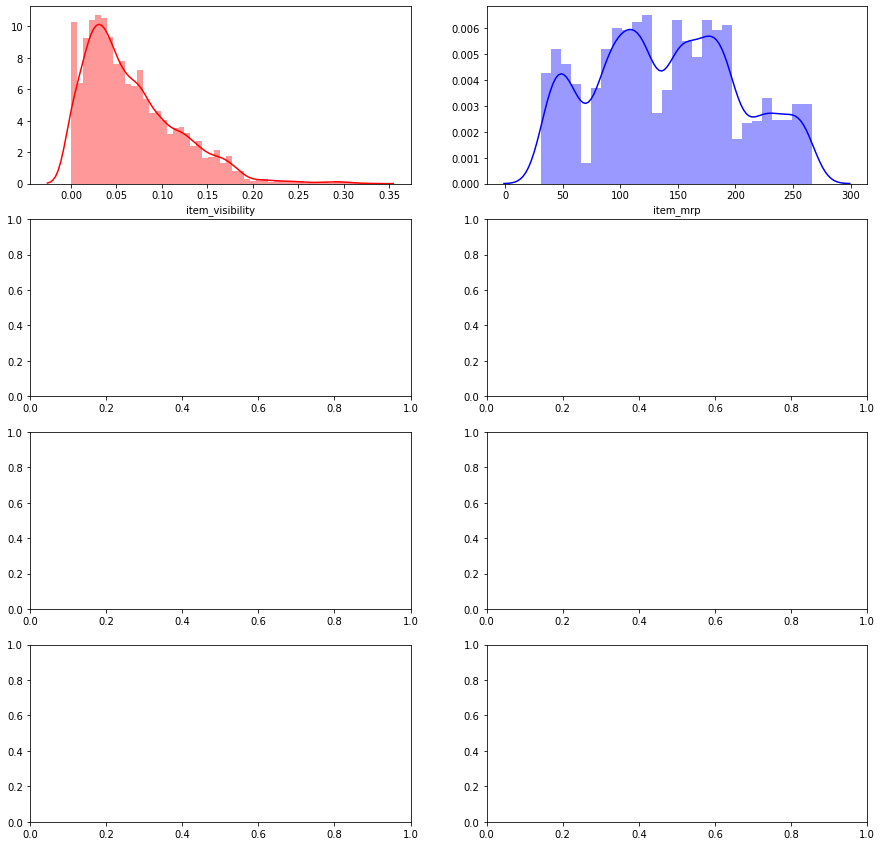

In [24]:
# Before Transformation
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(data["item_outlet_sales"], kde =True, ax=ax[3,1])
plt.show()
plt.savefig('hist.png',dpi=300)

## Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count¶


In [25]:


cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type','item_type_combined','source']

for i in cols:
    x  = data[i].value_counts().to_dict()
    data[i] = data[i].map(x)
data.head()

KeyError: 'source'

In [26]:
data.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
item_type_combined           0
dtype: int64

In [27]:
new_data.info()

NameError: name 'new_data' is not defined

In [43]:
#COPYING DATA 
new_data= data.copy()

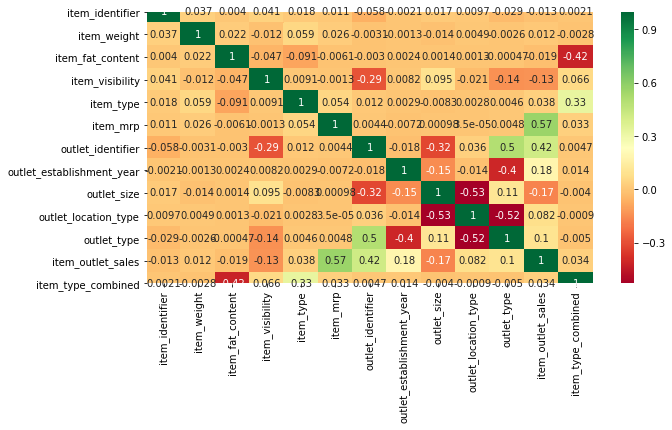

In [33]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)

In [44]:
#REMOVING LESS CORRELATED COLUMNS 
new_data =new_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type",'item_type_combined','item_visibility'], axis = 1)

In [45]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
item_mrp                     8523 non-null float64
outlet_identifier            8523 non-null int64
outlet_establishment_year    8523 non-null int64
outlet_size                  8523 non-null int64
outlet_type                  8523 non-null int64
item_outlet_sales            8523 non-null float64
dtypes: float64(2), int64(4)
memory usage: 399.6 KB


In [46]:
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

In [47]:
new_data.head()

,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,5.520697,6.835185,6.835185,7.934872,8.626406,8.225541
1,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


In [48]:
new_data.describe()

,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4.828182,6.766504,6.878754,8.119456,8.026972,7.296540
std,0.526097,0.180272,0.225161,0.512345,0.825912,1.017108
min,3.443299,6.269096,6.318968,6.837333,6.833032,3.505257
25%,4.541447,6.833032,6.833032,7.934872,6.987490,6.726530
50%,4.962934,6.835185,6.835185,8.475954,8.626406,7.492388
75%,5.223829,6.835185,6.837333,8.475954,8.626406,8.039575
max,5.586831,6.840547,7.288244,8.475954,8.626406,9.479372


In [49]:
#Independent Variables:
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)

In [50]:
#Splitting The data  into Train and Test Dataset:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [51]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#Prediction
y_pred = regressor.predict(x_test)

In [53]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.7571485127456504

In [ ]:
11:26

In [54]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.5196499811964441

## R- squad = 0.75
## Rmse = .5196

In [55]:
#Residue of the Linear Regression Model 
residue_lr = y_test -y_pred

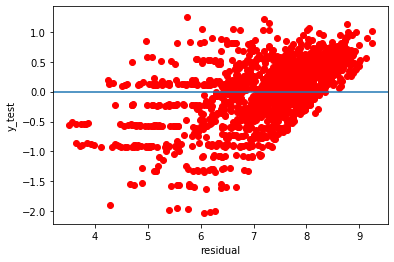

In [56]:
#Plotting Residual Plot
plt.scatter(y_test,residue_lr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [57]:
x_train = stm.add_constant(x_train)  #This will help us to get the value of a in Y = a + bX
x_train.head()

C:\Users\MANDY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type
7708,1.0,5.544926,6.833032,6.833032,7.934872,6.833032
4369,1.0,5.181030,6.835185,6.835185,8.475954,8.626406
5978,1.0,5.242208,6.835185,6.835185,8.475954,8.626406
4117,1.0,4.754287,6.318968,6.318968,8.475954,6.987490
5291,1.0,4.846810,6.835185,6.835185,8.475954,8.626406


In [58]:
#Ordinary Least Squared (OLS) Regression
model = stm.OLS(y_train,x_train).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     3501.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:08:16   Log-Likelihood:                -5387.1
No. Observations:                6818   AIC:                         1.079e+04
Df Residuals:                    6812   BIC:                         1.083e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -26.0947      0.358    -72.865      0.000     -26.797     -25.393
item_mrp                      1.0133      0.012     82.533      0.000       0.989       1.037
outlet_identifier             3.6508      0.044     82.173      0.000       3.564       3.738
outlet_establishment_year     0.5469      0.031     17.386      0.000       0.485       0.609
outlet_size                   0.0303      0.013      2.291      0.022       0.004       0.056
outlet_type                  -0.0266      0.010     -2.741      0.006      -0.046      -0.008
==============================================================================
Omnibus:                      782.368   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1174.185
Skew:                          -0.847   Prob(JB):                    1.07e-255
Kurtosis:                       4.123   Cond. No.                         877.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_test = stm.add_constant(x_test)
X_test.head()

###  check assumption of linear regression